In [1]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\trekk\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


147


C:\Users\trekk\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\configuration_utils.py:358: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
clips/mfaq


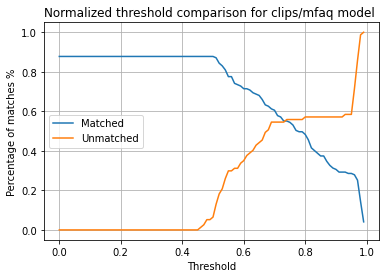

129   0   0.8775510204081632   0.0 0.731 0.731
129   0   0.8775510204081632   0.01 0.731 0.731
129   0   0.8775510204081632   0.02 0.731 0.731
129   0   0.8775510204081632   0.03 0.731 0.731
129   0   0.8775510204081632   0.04 0.731 0.731
129   0   0.8775510204081632   0.05 0.731 0.731
129   0   0.8775510204081632   0.06 0.731 0.731
129   0   0.8775510204081632   0.07 0.731 0.731
129   0   0.8775510204081632   0.08 0.731 0.731
129   0   0.8775510204081632   0.09 0.731 0.731
129   0   0.8775510204081632   0.1 0.731 0.731
129   0   0.8775510204081632   0.11 0.731 0.731
129   0   0.8775510204081632   0.12 0.731 0.731
129   0   0.8775510204081632   0.13 0.731 0.731
129   0   0.8775510204081632   0.14 0.731 0.731
129   0   0.8775510204081632   0.15 0.731 0.731
129   0   0.8775510204081632   0.16 0.731 0.731
129   0   0.8775510204081632   0.17 0.731 0.731
129   0   0.8775510204081632   0.18 0.731 0.731
129   0   0.8775510204081632   0.19 0.731 0.731
129   0   0.8775510204081632   0.2 0.731 0

In [4]:

import json
  
# Opening JSON file
testing = open("C:\\Users\\trekk\\Desktop\\thesis\\ScenarioCorpusMatching-master\\data\\ai2MatchesGSETesting.json")
validation = open("C:\\Users\\trekk\\Desktop\\thesis\\ScenarioCorpusMatching-master\\data\\ai2MatchesGSEValidation.json")
training = open("C:\\Users\\trekk\\Desktop\\thesis\\ScenarioCorpusMatching-master\\data\\ai2MatchesGSETraining.json")


testingData = json.load(testing)
trainingData = json.load(training)
validationData = json.load(validation)


import matplotlib.pyplot as plt


#possible configurations:
#[trainingData,validationData] - chosing threshold on both training and val
#[trainingData] - chosing threshold only on training
#[testingData] - testing chosen threshold (change for loop)

#config = [trainingData,validationData]
config = [testingData]


#models = ['clips/mfaq','sentence-transformers/multi-qa-mpnet-base-dot-v1','all-mpnet-base-v2','all-distilroberta-v1','all-MiniLM-L12-v2']
#models = ['sentence-transformers/multi-qa-mpnet-base-dot-v1']
#models = ['all-mpnet-base-v2','all-distilroberta-v1','all-MiniLM-L12-v2']

#models = ['all-MiniLM-L12-v2']

models = ['clips/mfaq']



totalMatched = 0
totalUnmatched = 0

if config == [trainingData,validationData]:
    totalMatched = 424 
    totalUnmatched = 326
if config == [trainingData]:
    totalMatched = 306 
    totalUnmatched = 227
if config == [testingData]:
    totalMatched = 147 
    totalUnmatched = 77

print(totalMatched)    

for modeltype in models:
    
    xvalue = []
    mn = []
    umn = []
    fp= []
    fn = []
    flag = 0
    
    model = SentenceTransformer(modeltype)
        
    for thresh in range(0,100,1):
        
        print(thresh)
        thresh = thresh/100
        xvalue.append(thresh)
        

        index =0;
        goldenMatch=[]
        modelMatch=[]
        matchesNumber = 0
        unmatchesNumber = 0
        falseNegative = 0
        falsePositive = 0
        count = 0


        for configuration in range(len(config)):
            ########
            #Data
            ########
            
            for index in range(0,len(config[configuration])):
                testingSentences = []
                modelScore = []


                testingSentences.append('<Q>'+config[configuration][index]['input']['text'])



                for i in config[configuration][index]['options']:
                    testingSentences.append('<A>'+i['text'])

                goldenMatch = config[configuration][index]['goldenMatch']
                embeddings = model.encode(testingSentences, convert_to_tensor=True)

                #print(len(embeddings))
                for j in range(len(embeddings)-1):
                    modelScore.append(cosine_similarity(embeddings[0].reshape(1, -1),embeddings[j+1].reshape(1, -1))[0][0]) 



                #if the biggest scoring answer is higher than the threshold, if the answer is the same as the goldenmatch, increase matched result
                # +1 because goldenMatch start from 1 while index starts from 0
                if (max(modelScore)) > (thresh):
                    if ((modelScore.index(max(modelScore)) + 1 is goldenMatch)):
                        matchesNumber += 1
                    else:
                        falsePositive += 1
                #if none of the answers are above the threshold, and the golden match is None (unmatched), unmatched result is increased
                else:
                    if (goldenMatch is None):
                        unmatchesNumber += 1
                    else:
                        falseNegative +=1
                

        fp.append(falsePositive)
        fn.append(falseNegative)
        mn.append(matchesNumber)
        umn.append(unmatchesNumber)
        
        

        #if(len(mn)>=2):
            #if (abs(matchesNumber/totalMatched - unmatchesNumber/totalUnmatched) > abs(mn[-2]/totalMatched - umn[-2]/totalUnmatched)):
                #flag = 1
                #break

            

    normmn = [x / totalMatched for x in mn]
    normumn = [x / totalUnmatched for x in umn]

    print(modeltype)
    
    plt.plot(xvalue,normmn,label='Matched')
    plt.plot(xvalue,normumn,label='Unmatched')
    plt.legend()
    plt.ylabel('Percentage of matches %')
    plt.xlabel('Threshold')
    plt.title("Normalized threshold comparison for "+modeltype+" model ")
    plt.grid()
    plt.show()


    for i in range(0,len(normmn)):
        f1 = '%.3f'%((2 * mn[i])/(2*mn[i] + fp[i] + fn[i]))
        f2 = '%.3f'%(mn[i]/(mn[i] + ((totalMatched+ totalUnmatched) - (mn[i] + umn[i]))*1/2))
        print(mn[i],' ',umn[i],' ',normmn[i] - normumn[i], ' ',xvalue[i],f1,f2)

        
        
testing.close()
training.close()
validation.close()

In [4]:
#checking data

import json

matched = 0
unmatched = 0
count = 0

# Opening JSON file
# Opening JSON file
testing = open("C:\\Users\\trekk\\Desktop\\thesis\\ScenarioCorpusMatching-master\\data\\ai2MatchesGSETesting.json")
validation = open("C:\\Users\\trekk\\Desktop\\thesis\\ScenarioCorpusMatching-master\\data\\ai2MatchesGSEValidation.json")
training = open("C:\\Users\\trekk\\Desktop\\thesis\\ScenarioCorpusMatching-master\\data\\ai2MatchesGSETraining.json")


datatrain = json.load(training)
dataval = json.load(validation)
datatest = json.load(testing)

for index in range(0,len(datatrain)):
    goldenMatch = datatrain[index]['goldenMatch']
    if(goldenMatch is None):
        unmatched +=1
    else:
        matched +=1
    count+=1
    
print('training dataset contains',matched,' matched, ',unmatched,' unmatched and ',count,' total elements')

matched = 0
unmatched = 0
count = 0

for index in range(0,len(datatest)):
    goldenMatch = datatest[index]['goldenMatch']
    if(goldenMatch is None):
        unmatched +=1
    else:
        matched +=1
    count+=1
    
print('testing dataset contains',matched,' matched, ',unmatched,' unmatched and ',count,' total elements')

matched = 0
unmatched = 0
count = 0

for index in range(0,len(dataval)):
    goldenMatch = dataval[index]['goldenMatch']
    if(goldenMatch is None):
        unmatched +=1
    else:
        matched +=1
    count+=1
    
print('validation dataset contains',matched,' matched, ',unmatched,' unmatched and ',count,' total elements')

print('training + validation dataset contains 424 matched, 326 unmatched and 750 total elements')

    

training dataset contains 306  matched,  227  unmatched and  533  total elements
testing dataset contains 147  matched,  77  unmatched and  224  total elements
validation dataset contains 118  matched,  99  unmatched and  217  total elements
training + validation dataset contains 424 matched, 326 unmatched and 750 total elements
